In [ ]:
from imblearn.over_sampling import SMOTE

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.under_sampling import NearMiss

%matplotlib inline 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("housing.csv")

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
X = df.drop("median_house_value", axis = 1)    # Independent variables
y = df.median_house_value                      # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [3]:
# Check the data types of each column and tells you how many rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#print out the columns with missing values in descending order 
missing_values = df.isnull().sum()
highest_counts = missing_values.sort_values(ascending=False)
highest_counts[highest_counts>0]

total_bedrooms    207
dtype: int64

So there is one categorical column ocean_proximity which we must decide how to handle and one column with missing values. Looking at the column, total_bedrooms, it wouldn't be wise to delete these and might be better to average out although we might be able to try both approaches and see does it make a difference. Before we decide what to do with ocean_proximity, it might be worth seeing whether there is a higher value on houses nearest to the ocean or bay versus properties inland and then decided whether one-hot encoding should be used or a more ordinal approach. 

In [5]:
numerical = df.select_dtypes("number")
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


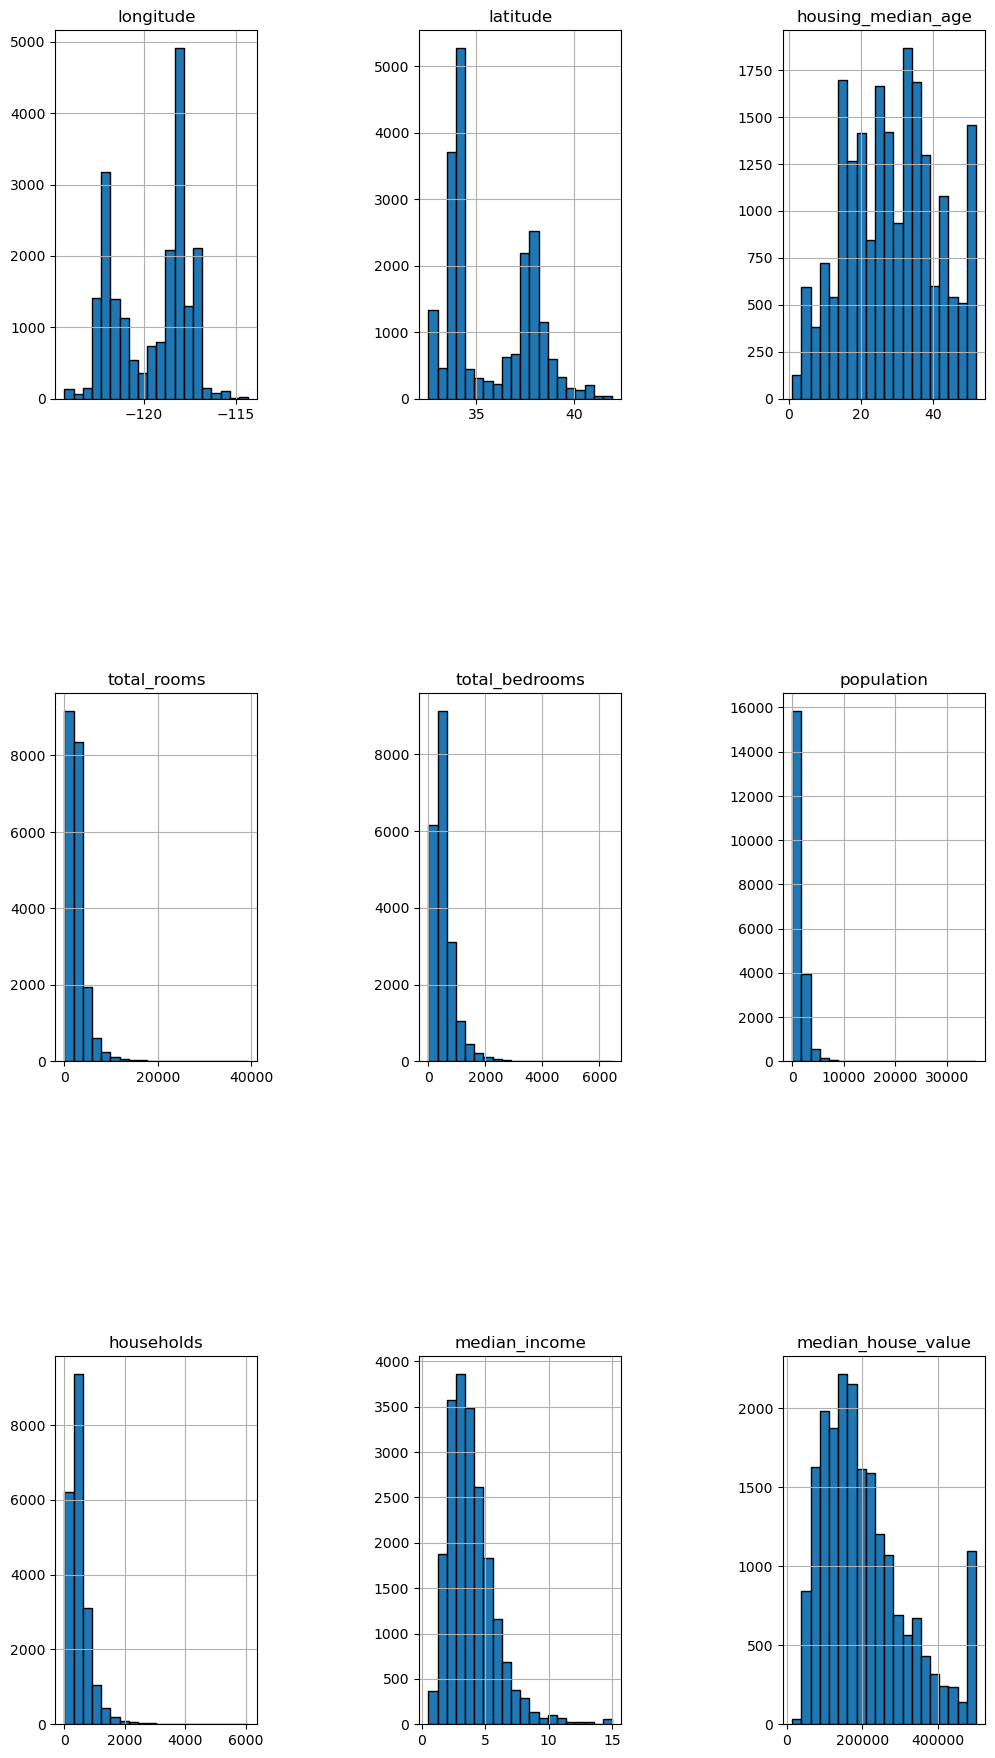

In [6]:
numerical.hist(
    bins=20, figsize=(12, 22), edgecolor="black"
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)